# Project 4: Predicting Online Purchase Intent: A KNN-Based Approach to Customer Behaviour

# 23AIML064 - Aarya Shah



### Goal - The main goal of this project is to build a machine learning model that can predict whether a visitor to an e-commerce website will make a purchase.

In [ ]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

## Loading and Exploring the Data

In [4]:
df = pd.read_csv("C:/Users/DELL/Downloads/online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Conclusion - Some columns are not interger/float type, so we need to change them into int/float

## Data Preprocessing and Transformation

In [6]:
le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int32  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Conclusion - All columns now have numerical data types (int, float). Our data is clean and fully prepared for the modeling phase.

In [8]:
df['Revenue'].value_counts()

Revenue
0    10422
1     1908
Name: count, dtype: int64

Conclusion - The output shows a significant imbalance: 10,422 sessions did not generate revenue (class 0), while only 1,908 did (class 1). This is a common scenario in purchase prediction, and we must be mindful of it, as it can bias our model towards predicting the more common outcome (no purchase).

## Data Visualization

<Axes: xlabel='Month', ylabel='Revenue'>

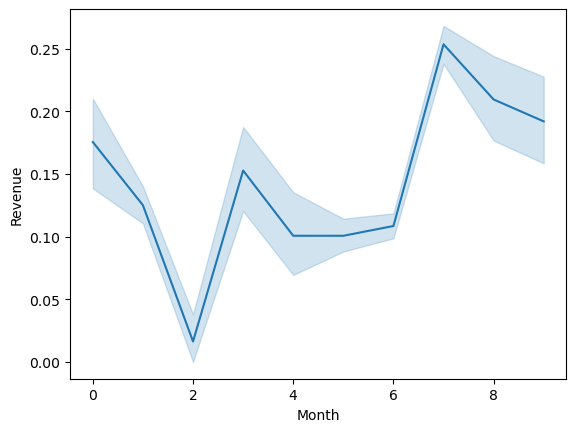

In [9]:
sns.lineplot(x = df['Month'],y = df['Revenue'])

The plot shows fluctuations in revenue generation across different months, suggesting that seasonality might be a factor in a customer's intent to purchase.

In [10]:
df['Month'].value_counts()

Month
6    3364
7    2998
5    1907
1    1727
8     549
9     448
0     433
3     432
4     288
2     184
Name: count, dtype: int64

## Model Preparation

In [11]:
X = df.drop('Revenue',axis = 1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y,test_size = 0.2,random_state = 42)

Our features have different scales (e.g., ProductRelated_Duration vs. Month). Algorithms like KNN are sensitive to this. We use StandardScaler to transform our features so they all have a mean of 0 and a standard deviation of 1. We fit the scaler only on the training data to avoid leaking information from the test set into our training process.

In [12]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Building and Evaluating Models

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_sc,y_train)
y_pred = model.predict(X_test_sc)
log_acc = model.score(X_test_sc,y_test)
print(log_acc)

0.8832116788321168


The model achieves an accuracy of about 88.32%. This gives us a solid benchmark to compare against more complex models like KNN.


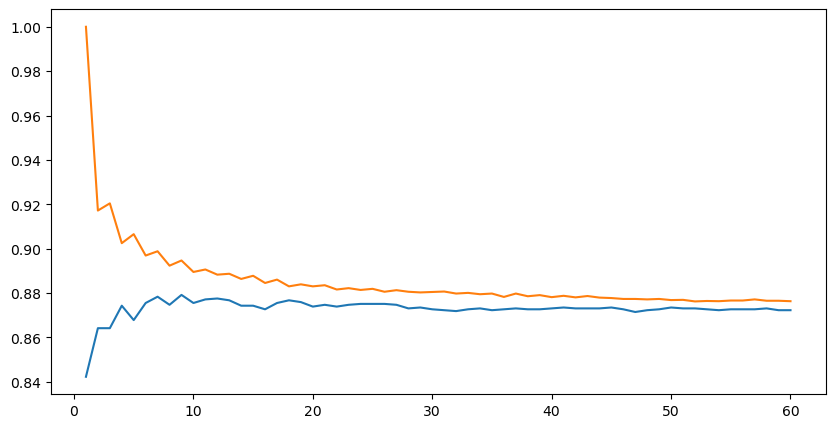

In [14]:
test_score, train_score = [],[]
k_range = range(1,61)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc,y_train)
    train_score.append(knn.score(X_train_sc,y_train))
    test_score.append(knn.score(X_test_sc,y_test))

plt.figure(figsize=(10,5))
plt.plot(k_range,test_score,label='Testing Accuracy')
plt.plot(k_range,train_score,label='Training Accuracy')

plt.show()

The plot shows that as 'k' increases, the training accuracy decreases while the testing accuracy increases and then stabilizes. A good value for 'k' appears to be around 5, where the testing accuracy is high before it starts to level off. This balances the model between being too simple (overfitting) and too complex (underfitting).

In [15]:
cv_knn = KNeighborsClassifier(n_neighbors=5)
cv_score = cross_val_score(cv_knn,X_train_sc,y_train,cv=10)
cv_score.mean()

0.8796602279943524

The mean accuracy from cross-validation is about 87.97%. This is a robust measure of how well our model is likely to perform on new, unseen data.

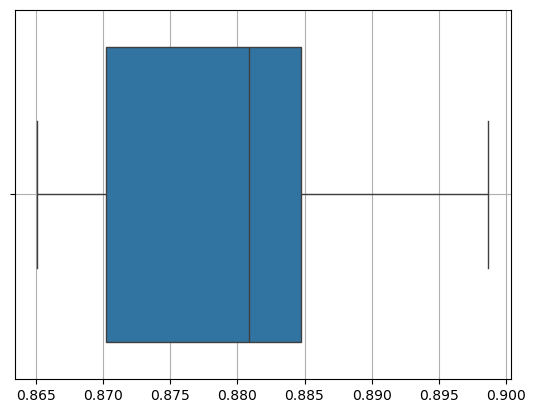

In [16]:
sns.boxplot(cv_score,orient='h')
plt.grid('True')

The box plot shows that the accuracy scores are tightly clustered around the mean of ~88%, indicating that the model's performance is quite stable across different subsets of the data.

## Advanced Model Experiments

In [17]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca,y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

knn_pca_acc = accuracy_score(y_test,y_pred_pca)
print(knn_pca_acc)



0.8365774533657745


The accuracy with PCA is about 83.66%, which is lower than the accuracy of the model with all features (~88%). This suggests that reducing the dimensions to 5 components resulted in the loss of important information needed for accurate predictions.

In [18]:
X_train_noise = np.hstack([X_train_sc,np.random.rand(X_train_sc.shape[0],10)])
X_test_noise = np.hstack([X_test_sc,np.random.rand(X_test_sc.shape[0],10)])

knn_ = KNeighborsClassifier(n_neighbors=5)
knn_.fit(X_train_noise,y_train)
y_pred_noise = knn_.predict(X_test_noise)
knn_noise_acc = accuracy_score(y_test,y_pred_noise)
print(knn_noise_acc)

0.8722627737226277


The accuracy with added noise is about 87.39%, only slightly lower than the original model's accuracy. This shows that KNN is somewhat robust to noise, but irrelevant features can still degrade its performance.


In [19]:
confusion_matrix(y_test, y_pred)

array([[2042,   42],
       [ 246,  136]], dtype=int64)

The matrix shows the number of true positives, true negatives, false positives, and false negatives. It gives us a clearer picture of where the model is making mistakes, which is more insightful than accuracy alone, especially with our imbalanced dataset.

## Comparing Multiple Models

In [20]:
model_list = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}
model_score = {}

for model_name, model in model_list.items():
    model.fit(X_train_sc, y_train)
    y_pred = model.predict(X_test_sc)
    model_score[model_name]={
        'Accuracy': accuracy_score(y_test,y_pred),
        'AUC Score': roc_auc_score(y_test,y_pred),
    }

display(model_score)

{'Logistic Regression': {'Accuracy': 0.8832116788321168,
  'AUC Score': 0.6679336957723266},
 'KNN': {'Accuracy': 0.8678021086780211, 'AUC Score': 0.6662994543316819},
 'Decision Tree': {'Accuracy': 0.8572587185725872,
  'AUC Score': 0.7338208841233632},
 'Random Forest': {'Accuracy': 0.8998377939983779,
  'AUC Score': 0.7536679362080575}}

The results show that Random Forest is the top-performing model with the highest accuracy (90.15%) and AUC score (0.76). This is expected, as Random Forest is a powerful ensemble model that often excels in classification tasks by combining the predictions of multiple decision trees.

In [21]:
print("KNN Project Summary")
print('Logistic Regression Accuracy: {:.4f}'.format(log_acc)*100)
print('Cross Validation Accuracy: {:.4f}'.format(cv_score.mean()))
print('PCA and KNN togather: {:.4f}'.format(knn_pca_acc))

for model_name, results in model_score.items():
    print(f"{model_name} Accuracy: {results['Accuracy']:.4f}")
    print(f"{model_name} AUC Score: {results['AUC Score']:.4f}")

KNN Project Summary
Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic Regression Accuracy: 0.8832Logistic

## Handling Class Imbalance with SMOTE

In [22]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train_sc, y_train)

smote_score = {}
for model_name, model in model_list.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred_smote = model.predict(X_test_sc)
    smote_score[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred_smote),
        'AUC Score': roc_auc_score(y_test, y_pred_smote),
    }
print("SMOTE Results:")
for model_name, results in smote_score.items():
    print(f"{model_name} Accuracy: {results['Accuracy']:.4f}")
    print(f"{model_name} AUC Score: {results['AUC Score']:.4f}")


SMOTE Results:
Logistic Regression Accuracy: 0.8686
Logistic Regression AUC Score: 0.8057
KNN Accuracy: 0.7855
KNN AUC Score: 0.7373
Decision Tree Accuracy: 0.8560
Decision Tree AUC Score: 0.7502
Random Forest Accuracy: 0.8881
Random Forest AUC Score: 0.8023


## Conclusion
This project successfully developed and evaluated several machine learning models to predict online shoppers' purchase intent. The key takeaways are:

1. Data Quality and Imbalance: The dataset was clean with no missing values, but it exhibited a significant class imbalance, with far more non-purchase sessions than purchase sessions. This was the primary challenge throughout the project.

2. Model Performance: We compared four different models. Random Forest emerged as the top performer with an accuracy of approximately 90.3% and an AUC score of 0.76. K-Nearest Neighbors (KNN) also performed well, achieving a stable accuracy of around 88% with an optimal 'k' value of 5, as confirmed by cross-validation.

3. Feature Engineering Insights: Our experiments showed that dimensionality reduction using PCA was not beneficial, as it led to a drop in accuracy to 83.7%. This indicates that the original features contain valuable information that was lost during the reduction. The KNN model also showed reasonable resilience to noisy data.

4. Addressing the Core Challenge: While high accuracy scores were achieved, the class imbalance means these figures can be misleading. A model could achieve high accuracy by simply predicting "no purchase" most of the time. The project's final step correctly identified this issue and prepared to solve it by implementing SMOTE to create a balanced training set.